In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import datetime
from datetime import timedelta 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [2]:
#Load the imputed df 
df = pd.read_csv('data/df1_mp_imputed2.csv')

In [3]:
pd.set_option('display.max_columns',500)

In [4]:
df.head()

,CRASH_ID,CTY_NAME,MUN_NAME,DATE,DAY,TIME,POL_CODE,POL_DEPT,POL_STA,KILLED,INJURED,PED_KILL,PED_INJ,SEVERITY,INTERSEC,ALCOHOL,HAZMAT,CRASH_TYPE,VEH_COUNT,LOCATION,LOC_DIR,ROUTE,RT_SFX,SRI,MP,RD_SYS,RD_CHAR,RD_SURF,SURF_COND,LIGHT,WEATHER,RD_DIV,RD_WRKZN,X_DIST,DIST_UNT,X_DIR,X_NAME,IS_RAMP,RAMP_RT,RAMP_DIR,SPD_LMT,SPD_X,LAT,LONG,CELL_USE,PROP_DMG,BADGE,TIME_ROUND,TMC
0,201702121,BERGEN,EAST RUTHERFORD BORO,3/29/2017,WE,1603.0,1,EAST RUTHERFORD PD,NaN,0,0,0,0,P,B,N,N,2.0,2,NJ 3 ...,E,3,NaN,00000003__,7.60,2,NaN,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,NaN,NaN,NaN,N,NaN,141,16:05,120N04734
1,2015021215-001780,BERGEN,EAST RUTHERFORD BORO,2/6/2015,F,2214.0,1,SECAUCUS PD,HQTS,0,2,0,0,I,B,N,N,2.0,2,NJ 3 ...,E,3,NaN,00000003__,8.00,2,1.0,2.0,1.0,6.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,NaN,NaN,NaN,N,NONE ...,156,22:15,120-04733
2,2015021215-013018,BERGEN,EAST RUTHERFORD BORO,8/29/2015,SA,2146.0,1,SECAUCUS PD,HQTS,0,0,0,0,P,B,N,N,3.0,2,NJ 3 ...,E,3,NaN,00000003__,8.10,2,1.0,2.0,1.0,6.0,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,NaN,NaN,NaN,N,DENTED GUARD RAIL ...,160,21:45,120-04733
3,2013021213-012195,BERGEN,EAST RUTHERFORD BORO,7/17/2013,W,824.0,1,SECAUCUS PD,HQTS,0,1,0,0,I,B,N,N,2.0,2,NJ 3 ...,E,3,NaN,00000003__,8.41,2,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1000.0,FE,W,MEADOWLANDS PKWY,NaN,NaN,NaN,55.0,NaN,NaN,NaN,N,NaN,150,8:25,120-04732
4,20170212BS-17-045134,BERGEN,EAST RUTHERFORD BORO,7/19/2017,WE,908.0,3,BERGEN CO SHERIFFS DEPT,PARAMUS,0,0,0,0,P,B,N,N,99.0,1,NJ 3 ...,E,3,NaN,00000003__,6.86,2,NaN,2.0,1.0,1.0,1.0,1.0,1.0,100.0,FE,E,N. SERVICE ROAD,NaN,NaN,NaN,55.0,25.0,NaN,NaN,N,SEE PAGE #3 ...,254,9:10,120N04736


In [5]:
# Total No. of crash
print('Total number of accident between 2013 and 2018:', df.shape[0])
# No. of features in df
print('Number of features in df:', df.shape[1])

Total number of accident between 2013 and 2018: 8115
Number of features in df: 49


In [6]:
pd.DataFrame(df.columns)

,0
0,CRASH_ID
1,CTY_NAME
2,MUN_NAME
3,DATE
4,DAY
5,TIME
6,POL_CODE
7,POL_DEPT
8,POL_STA
9,KILLED


## Drop Irrelevant Features

In [7]:
# Remove irrelevant features
irrevant_cols = ['CTY_NAME', 'MUN_NAME', 'POL_CODE', 'POL_DEPT','POL_STA', 'INTERSEC', 'RT_SFX','SRI', 'X_DIST', 
                 'X_DIR', 'X_NAME', 'IS_RAMP', 'RAMP_RT', 'RAMP_DIR', 'SPD_X', 'LAT', 'LONG', 'PROP_DMG', 'BADGE', 
                 'SPD_LMT', 'DIST_UNT', 'RD_CHAR']
                 
df.drop(columns = irrevant_cols, inplace = True)

##  Incomplete Data Review 

#### Filter Wrong Crash Records

It was found that the dataset includes crash records occurred on other roadways. These wrong records were removed.

In [8]:
df['LOCATION'].value_counts()

NJ 3                                                  7879
MONMOUTH COUNTY 3                                      234
OCEAN COUNTY 3                                           2
Name: LOCATION, dtype: int64

In [12]:
# Text has an extra blank space on right side
df['LOCATION'] = df['LOCATION'].str.rstrip()
df.drop(df[(df['LOCATION'] == 'MONMOUTH COUNTY 3') | (df['LOCATION'] == 'OCEAN COUNTY 3')].index, inplace = True)

Overall, the number of crashes occurred on NJ 3 was 7,879 during Jan, 2013 and Dec, 2018

#### Filter insufficient 'Time' information

Note that the time digits of 3 or 4 are incomplete (or insufficient) to process. Need to be filtered.

In [9]:
df['TIME'].astype(str).str.len().value_counts()

6    5547
5    2399
4     113
3      56
Name: TIME, dtype: int64

In [10]:
# Number of insufficient time information
df[df['TIME'].astype(str).str.len() <= 4].shape

(169, 27)

In [12]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [13]:
df[df['TIME'].astype(str).str.len() <= 4].groupby(df['DATE'].dt.year)['TIME'].count()

DATE
2013    25
2014    36
2015    22
2016    22
2017    25
2018    20
Name: TIME, dtype: int64

#### Find the number of NA in 'MP' 

In [14]:
df['MP'].isna().sum(axis=0)

1822

In [15]:
# Number of missing MP
df[df['MP'].isna()].shape

(1822, 27)

In [16]:
df[df['MP'].isna()].groupby(df['DATE'].dt.year)['TIME'].count()

DATE
2013    338
2014    390
2015    376
2016    423
2017    228
2018     63
Name: TIME, dtype: int64

In [17]:
df[(df['TIME'].astype(str).str.len() > 4) & (df['MP'].isna() == False)].groupby(df['DATE'].dt.year)['TIME'].count()

DATE
2013     917
2014     781
2015     956
2016     859
2017    1206
2018    1440
Name: TIME, dtype: int64

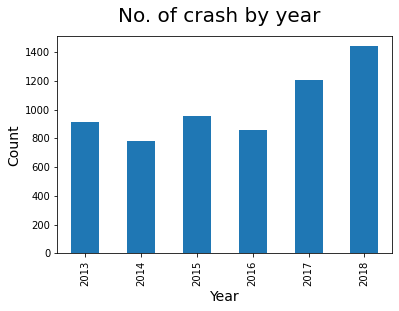

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = df[(df['TIME'].astype(str).str.len() > 4) & (df['MP'].isna() == False)].groupby(df['DATE'].dt.year)['TIME'].count().plot.bar()
fig.suptitle('No. of crash by year', fontsize=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.show()

Convert 'TIME' data type to integer. To this end, fix Nan first. Write a function to format integer into 'hh:mm'

In [19]:
df['TIME'].fillna(0, inplace = True)

In [20]:
df['TIME'] = df['TIME'].astype(int)

In [21]:
df['TIME'].astype(str).str.len().value_counts()

4    5547
3    2399
2     113
1      56
Name: TIME, dtype: int64

In [22]:
df.drop(df[df['TIME'].astype(str).str.len() == 1].index, inplace = True)
df.drop(df[df['TIME'].astype(str).str.len() == 2].index, inplace = True)

In [23]:
#Input: Military time (int)
#Output: The hour from military time (int)
#Desc: Extracts the hour from military time 
def time_conversion(time):
    #turn the time into a string so we can subset it
    time = str(time)
    #if the military time only has two elements, that means that the time is 00:xx or 00:0x
    if len(time)<=2:
        return(0)
    #if the length of the time is 3, then it will be 0y:xx in military time
    elif len(time)==3:
        return(time[0]+':'+time[1:3]+':'+'00')
    else:
        return(time[:2]+':'+time[2:4]+':'+'00')

In [24]:
df['TIME'] = [time_conversion(i) for i in df['TIME']]

In [25]:
from datetime import timedelta 
df['timestamp'] = pd.to_datetime(df['DATE'].apply(str) + ' ' + df['TIME'].apply(str))

In [26]:
df.shape

(7946, 28)

#### Remove null MP (milepost) and TMC (Traffic Message Channel)

In [27]:
df.drop(df[df['MP'].isnull() == True].index, inplace = True)

In [28]:
df.drop(df[df['TMC'].isnull() == True].index, inplace = True)

In [29]:
df.shape

(6144, 28)

In [30]:
df.to_csv("data/df_filtered.csv")